# Morphological Operators
* Sets of kernels that can achieve a variety of effects such as reduing noise
* Cretain operators are very good at reducing black points on white backgrounds (and vice versa)
* Other operators can achieve an erosion and dilation effect that can add or erode from an exising image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300), fontFace=font, fontScale= 5,
                color=(255,255,255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
img = load_img()

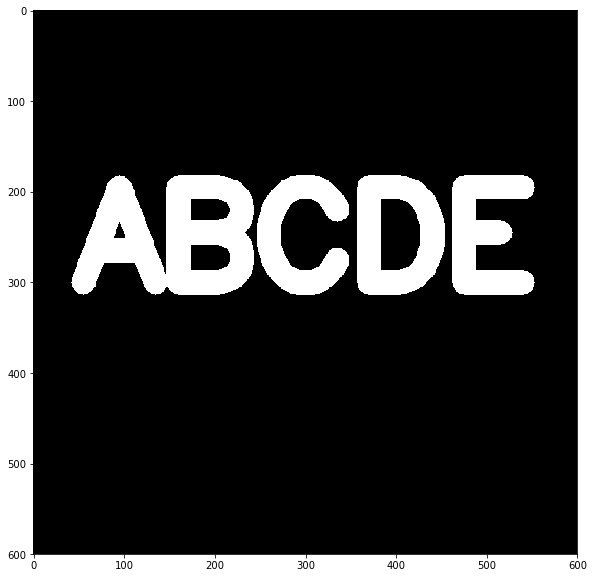

In [5]:
display_img(img)

## Erosion
Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

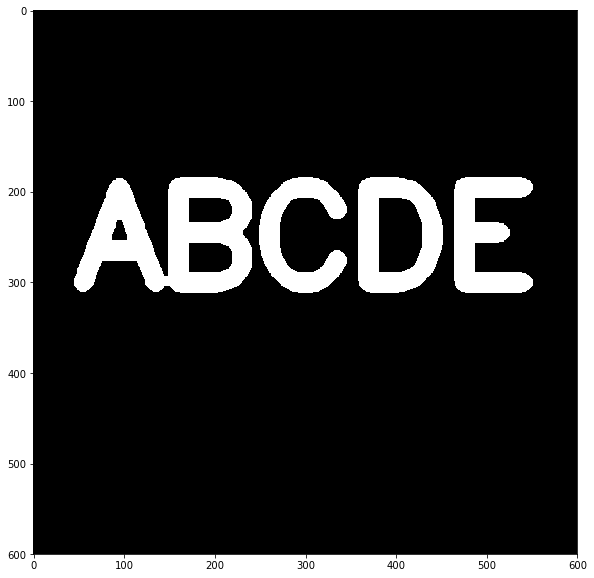

In [6]:
kernel = np.ones((5,5), np.uint8)
erosion1 = cv2.erode(img, kernel,iterations=1)
display_img(erosion1)

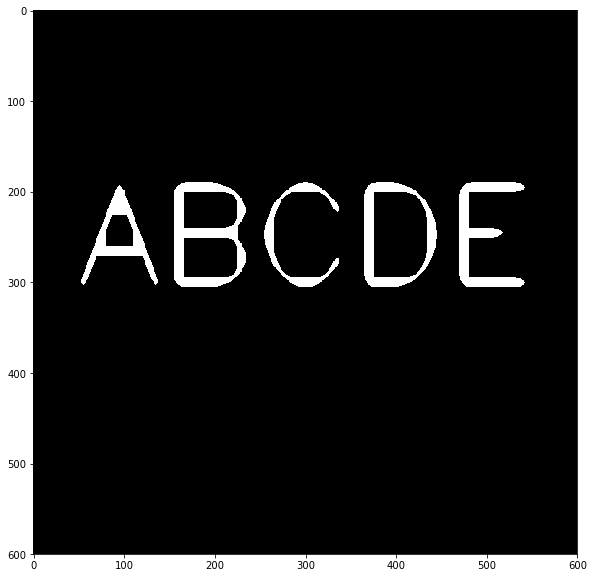

In [7]:
img = load_img()
kernel = np.ones((5,5), np.uint8)
erosion4 = cv2.erode(img, kernel,iterations=4)
display_img(erosion4)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [8]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600))
white_noise

array([[0, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0]])

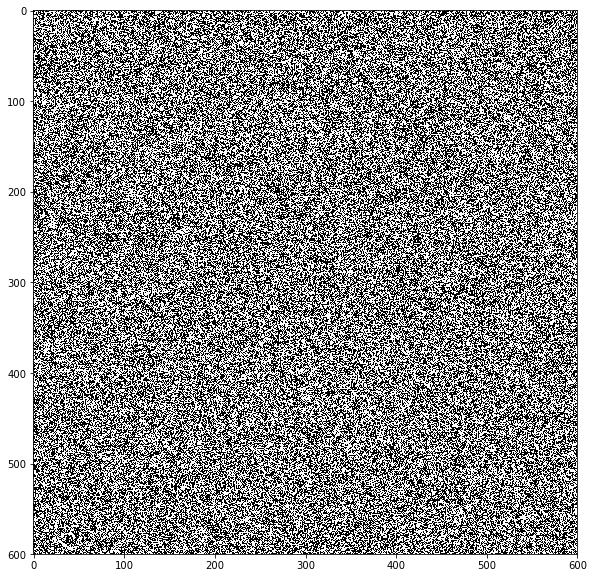

In [9]:
display_img(white_noise)

In [10]:
white_noise = white_noise * 255
white_noise.shape

(600, 600)

In [11]:
img.shape

(600, 600)

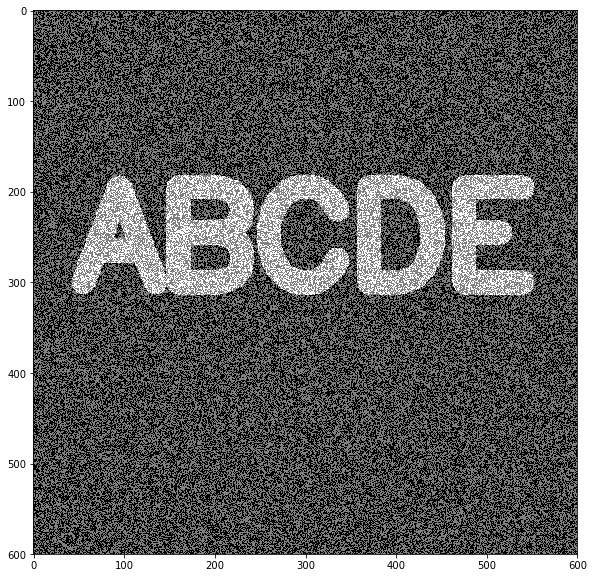

In [12]:
noise_img = white_noise + img
display_img(noise_img)

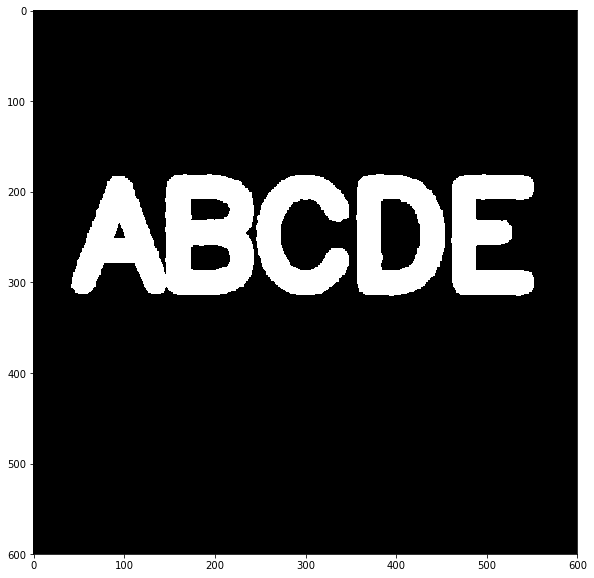

In [13]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [14]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0]])

In [15]:
black_noise= black_noise * -255
black_noise_img = img + black_noise
black_noise_img

array([[   0.,    0., -255., ...,    0., -255.,    0.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       [-255.,    0.,    0., ..., -255.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -255.,    0.,    0.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       [   0., -255., -255., ..., -255., -255.,    0.]])

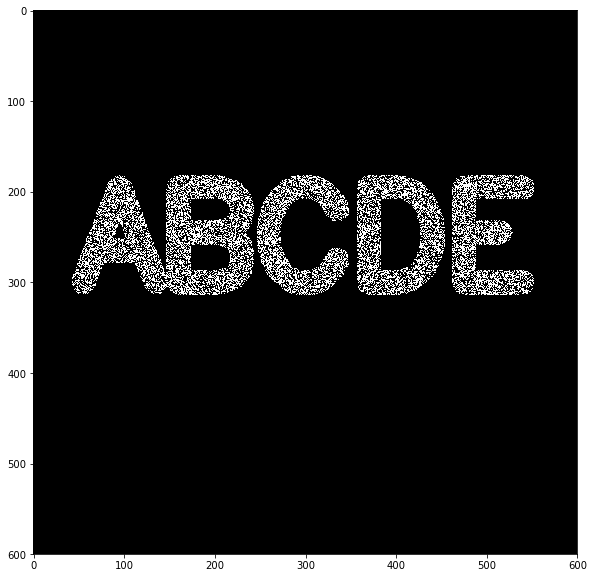

In [16]:
black_noise_img[black_noise_img == -255] = 0
display_img(black_noise_img)

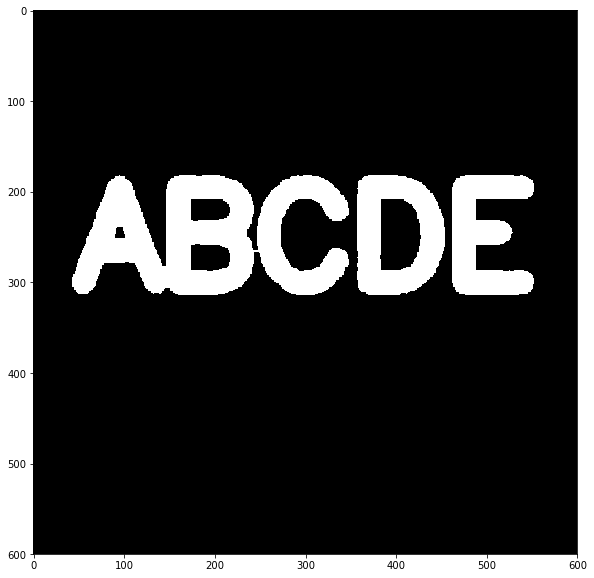

In [17]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

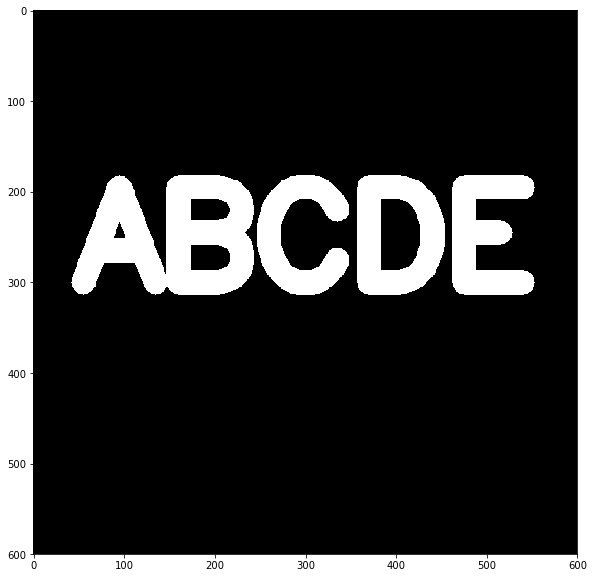

In [18]:
img = load_img()
display_img(img)

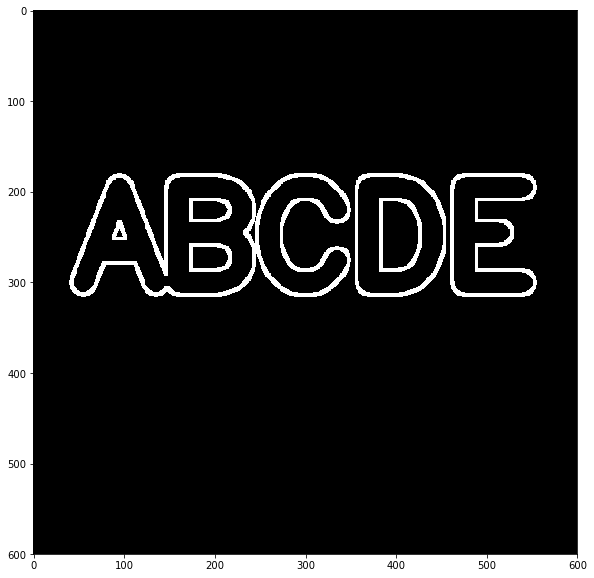

In [19]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel)
display_img(gradient)